<a href="https://colab.research.google.com/github/alenabozny/context-augmentation/blob/master/LIWC_LR_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Mount Google Drive to the Notebook. This allows us to load datasets that are copyied to the GD directory.**


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Load the dataset (LIWC features for CRED/NONCRED data)**

In [3]:
import pandas as pd
import numpy as np

statins = pd.read_csv("/content/drive/My Drive/Colab Notebooks/LIWC_paragrafy.csv", sep=";",decimal=',', header=0)
psychiatry = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/psychiatry.csv", sep=";",decimal=',', header=0)
antioxidants = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/antioxidants.csv", sep=";",decimal=',', header=0)
ssri_during_pregnancy = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/ssri_during_pregnancy.csv", sep=";",decimal=',', header=0)
cc_vs_nb = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/cc_vs_nb.csv", sep=";",decimal=',', header=0)
aspirin_pregnancy = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/aspirin_pregnancy.csv", sep=";",decimal=',', header=0)
children_antibiotics = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/children_antibiotics.csv", sep=";",decimal=',', header=0)
allergy_testing = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/allergy_testing.csv", sep=";",decimal=',', header=0)
diet_and_autism = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/diet_and_autism.csv", sep=";",decimal=',', header=0)
heart_supplements = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/heart_supplements.csv", sep=";",decimal=',', header=0)
ssri_during_pregnancy = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/ssri_during_pregnancy.csv", sep=";",decimal=',', header=0)
steroids_for_kids = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/steroids_for_kids.csv", sep=";",decimal=',', header=0)
vaccination = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/vaccination.csv", sep=";",decimal=',', header=0)

statins['Body'].head()

0    Statins available in the United States include...
1    Statins are one of the most common medicines p...
2    They work on an enzyme that is used by our bod...
3    Yep, that’s right…our bodies make cholesterol,...
4    That’s because cholesterol is vital for our su...
Name: Body, dtype: object

In [4]:
statins_paragraphs = statins[0:1917:3]
psychiatry_paragraphs = psychiatry[0:len(psychiatry):3]
antioxidants_paragraphs = antioxidants[0:len(antioxidants):3]
ssri_during_pregnancy_paragraphs = ssri_during_pregnancy[0:len(ssri_during_pregnancy):3]
cc_vs_nb_paragraphs = cc_vs_nb[0:len(cc_vs_nb):3]
aspirin_pregnancy_paragraphs = aspirin_pregnancy[0:len(aspirin_pregnancy):3]
children_antibiotics_paragraphs = children_antibiotics[0:len(children_antibiotics):3]
allergy_testing_paragraphs = allergy_testing[0:len(allergy_testing):3]
diet_and_autism_paragraphs = diet_and_autism[0:len(diet_and_autism):3]
heart_supplements_paragraphs = heart_supplements[0:len(heart_supplements):3]
steroids_for_kids_paragraphs = steroids_for_kids[0:len(steroids_for_kids):3]
vaccination_paragraphs = vaccination[0:len(vaccination):3]

In [ ]:
ssri_during_pregnancy_paragraphs.head()

,Source (A),Source (B),WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,...,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,There’s a growing and confusing group of studi...,NONCRED,86,98.09,63.65,34.47,1.00,21.50,38.37,94.19,46.51,5.81,0.00,0.0,0.00,0.0,0.0,0.00,5.81,12.79,16.28,3.49,3.49,6.98,1.16,8.14,0.00,0.00,0.00,0.00,2.33,11.63,2.33,9.30,5.81,0.0,2.33,8.14,4.65,0.00,...,4.65,1.16,1.16,9.30,2.33,0.00,2.33,1.16,3.49,1.16,3.49,1.16,11.63,3.49,3.49,4.65,8.14,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,12.79,3.49,2.33,0.0,0.0,0.0,0.0,1.16,0.00,3.49,2.33,0.0
3,"In the latest study to address the subject, re...",NEU,84,96.66,68.29,23.51,1.00,21.00,30.95,83.33,46.43,4.76,1.19,0.0,0.00,0.0,0.0,1.19,3.57,8.33,19.05,8.33,2.38,4.76,2.38,13.10,3.57,3.57,1.19,1.19,3.57,5.95,0.00,5.95,1.19,0.0,4.76,10.71,3.57,1.19,...,1.19,0.00,0.00,5.95,1.19,0.00,1.19,2.38,1.19,13.10,0.00,0.00,10.71,1.19,2.38,5.95,5.95,0.0,1.19,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,16.67,3.57,5.95,0.0,0.0,0.0,0.0,3.57,0.00,1.19,2.38,0.0
6,"In the study, published in JAMA Pediatrics, am...",CRED,106,84.73,68.13,54.63,25.77,26.50,32.08,84.91,43.40,6.60,0.94,0.0,0.00,0.0,0.0,0.94,5.66,5.66,14.15,6.60,1.89,8.49,2.83,10.38,8.49,7.55,2.83,0.00,2.83,8.49,2.83,2.83,0.94,0.0,1.89,12.26,5.66,0.00,...,0.94,0.00,0.00,3.77,0.00,0.94,1.89,0.94,0.00,5.66,3.77,0.94,14.15,0.00,12.26,1.89,4.72,0.0,0.00,0.00,0.0,0.0,0.94,0.0,0.0,0.0,0.94,0.0,14.15,2.83,9.43,0.0,0.0,0.0,0.0,0.94,0.00,0.94,0.00,0.0
9,"Other research showed, for example, that older...",NONCRED,101,94.14,65.41,29.80,12.61,25.25,35.64,79.21,43.56,5.94,0.00,0.0,0.00,0.0,0.0,0.00,5.94,4.95,19.80,3.96,4.95,8.91,0.00,8.91,6.93,4.95,0.99,0.00,0.00,5.94,1.98,2.97,0.99,0.0,0.99,4.95,0.00,0.00,...,0.00,0.00,0.00,1.98,0.00,0.99,0.99,0.00,0.00,5.94,2.97,0.99,15.84,4.95,8.91,1.98,3.96,0.0,0.00,0.00,0.0,0.0,1.98,0.0,0.0,0.0,1.98,0.0,12.87,2.97,7.92,0.0,0.0,0.0,0.0,0.99,0.00,0.99,0.00,0.0
12,Further studies will likely investigate that p...,CRED,49,7.80,58.08,21.80,91.78,12.25,20.41,87.76,55.10,20.41,4.08,0.0,2.04,0.0,0.0,2.04,16.33,6.12,4.08,14.29,8.16,4.08,4.08,24.49,2.04,2.04,4.08,0.00,0.00,4.08,4.08,0.00,0.00,0.0,0.00,6.12,0.00,0.00,...,0.00,0.00,0.00,2.04,2.04,0.00,0.00,0.00,0.00,0.00,16.33,8.16,12.24,2.04,8.16,2.04,4.08,0.0,0.00,2.04,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,22.45,6.12,4.08,0.0,0.0,0.0,0.0,2.04,6.12,4.08,0.00,0.0


In [5]:
def y_to_binary(Y):
  def label_to_0_1(lbl):
    if lbl=='CRED':
      return 1
    else:
      return 0

  Y_mapped = map(label_to_0_1, Y)
  return np.array(list(Y_mapped))

In [6]:
np.shape(ssri_during_pregnancy_paragraphs)

(58, 95)

In [7]:
!pip install spacytextblob

     |████████████████████████████████| 10.4MB 5.9MB/s 
     |████████████████████████████████| 1.1MB 34.1MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


# The Model
Features:
- TFIDF
- NER
- POS
- LIWC
- sentiment

In [8]:
from sklearn.pipeline import Pipeline
# from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing as p

def get_y(data, y_column = 'Source (B)'):
  Y = data[y_column]
  Y = y_to_binary(Y)
  print(np.shape(Y))
  return Y

statins_Y = get_y(statins_paragraphs, y_column='Rate')
psychiatry_Y = get_y(psychiatry_paragraphs)
antioxidants_Y = get_y(antioxidants_paragraphs)
cc_vs_nb_Y = get_y(cc_vs_nb_paragraphs)
aspirin_pregnancy_Y = get_y(aspirin_pregnancy_paragraphs)
children_antibiotics_Y = get_y(children_antibiotics_paragraphs)
allergy_testing_Y = get_y(allergy_testing_paragraphs)
diet_and_autism_Y = get_y(diet_and_autism_paragraphs)
heart_supplements_Y = get_y(heart_supplements_paragraphs)
ssri_during_pregnancy_Y = get_y(ssri_during_pregnancy_paragraphs)
steroids_for_kids_Y = get_y(steroids_for_kids_paragraphs)
vaccination_Y = get_y(vaccination_paragraphs)

(639,)
(807,)
(225,)
(171,)
(109,)
(185,)
(451,)
(182,)
(150,)
(58,)
(241,)
(482,)


### **TFIDF**

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk

nltk.download('punkt')

from nltk.stem import PorterStemmer
from nltk import word_tokenize, sent_tokenize

def get_X_tfidf(data, body_column='Source (A)'):
  corpus = data[body_column]
  corpus_removed_numbers = [re.sub(r'\d+', '', s) for s in corpus]

  corpus_tokenized = []
  stemmer= PorterStemmer()

  for s in corpus_removed_numbers:
    tokens = word_tokenize(s)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    corpus_tokenized.append(" ".join(stemmed_tokens))

  vectorizer = TfidfVectorizer()
  X_tfidf_array = vectorizer.fit_transform(corpus_tokenized)
  X_tfidf_array = np.array(X_tfidf_array.toarray())
  X_tfidf = pd.DataFrame(X_tfidf_array, columns=vectorizer.get_feature_names())
  print(np.shape(X_tfidf))

  return X_tfidf

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
statins_X_tfidf = get_X_tfidf(statins_paragraphs, body_column='Body')
psychiatry_X_tfidf = get_X_tfidf(psychiatry_paragraphs)
antioxidants_X_tfidf = get_X_tfidf(antioxidants_paragraphs)
cc_vs_nb_X_tfidf = get_X_tfidf(cc_vs_nb_paragraphs)
aspirin_pregnancy_X_tfidf = get_X_tfidf(aspirin_pregnancy_paragraphs)
children_antibiotics_X_tfidf = get_X_tfidf(children_antibiotics_paragraphs)
allergy_testing_X_tfidf = get_X_tfidf(allergy_testing_paragraphs)
diet_and_autism_X_tfidf = get_X_tfidf(diet_and_autism_paragraphs)
heart_supplements_X_tfidf = get_X_tfidf(heart_supplements_paragraphs)
ssri_during_pregnancy_X_tfidf = get_X_tfidf(ssri_during_pregnancy_paragraphs)
steroids_for_kids_X_tfidf = get_X_tfidf(steroids_for_kids_paragraphs)
vaccination_X_tfidf = get_X_tfidf(vaccination_paragraphs)

(639, 3352)
(807, 4013)
(225, 1565)
(171, 1511)
(109, 1219)
(185, 1567)
(451, 2231)
(182, 1695)
(150, 1431)
(58, 889)
(241, 1407)
(482, 2742)


In [ ]:
ssri_during_pregnancy_X_tfidf.head()

,aa,abil,abnorm,about,absolut,abus,access,accompani,accord,accordingli,account,accumul,acid,acrocynaosi,across,act,acupunctur,ad,adapt,add,address,adjust,administ,admiss,admit,adolesc,adult,advers,advis,ae,affect,after,against,age,aj,al,all,alon,alprazolam,also,...,we,weak,weigh,weight,weissman,well,were,weren,werler,what,when,where,whether,whi,which,while,white,whitelaw,who,whose,will,wind,with,withdraw,within,without,woman,womb,women,work,worri,worth,would,year,yoga,york,you,your,zero,zoloft
0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.111466,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.203414,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.103277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.092423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146028,0.0,0.0,0.146028,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.104303,0.099856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076769,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.418425,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.099856,0.0,0.0,0.086351,0.000000,0.000000,0.0,0.101397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.077617,0.210835,0.0,0.0,0.091905,0.0,0.0,0.0,0.0,0.000000,0.083858,0.0,0.0,0.000000,0.175187,0.000000,0.0,0.042576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.122302,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.122302,0.0,0.0,0.0,0.087356,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064296,...,0.000000,0.0,0.000000,0.0,0.0,0.154814,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.091656,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.042461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.129985,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.142457,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.150362,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##**NER**

In [11]:
import spacy
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm

nlp = en_core_web_sm.load()

def get_X_ner(data, body_column='Source (A)'):
  corpus = data[body_column]
  X_ner_counters = []
  X_ner_array = []
  meta_counter = Counter()

  for s in corpus:
    doc = nlp(s)
    labels = [x.label_ for x in doc.ents]
    X_ner_counters.append(Counter(labels))
    meta_counter += Counter(labels)

  for c in X_ner_counters:
    X_ner_array.append([c[key] for key in list(meta_counter.keys())])

  X_ner = pd.DataFrame(X_ner_array, columns=list(meta_counter.keys()))
  print(np.shape(X_ner))
  
  return X_ner

/usr/local/lib/python3.7/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [12]:
statins_X_ner = get_X_ner(statins_paragraphs, body_column='Body')
psychiatry_X_ner = get_X_ner(psychiatry_paragraphs)
antioxidants_X_ner = get_X_ner(antioxidants_paragraphs)
cc_vs_nb_X_ner = get_X_ner(cc_vs_nb_paragraphs)
aspirin_pregnancy_X_ner = get_X_ner(aspirin_pregnancy_paragraphs)
children_antibiotics_X_ner = get_X_ner(children_antibiotics_paragraphs)
allergy_testing_X_ner = get_X_ner(allergy_testing_paragraphs)
diet_and_autism_X_ner = get_X_ner(diet_and_autism_paragraphs)
heart_supplements_X_ner = get_X_ner(heart_supplements_paragraphs)
ssri_during_pregnancy_X_ner = get_X_ner(ssri_during_pregnancy_paragraphs)
steroids_for_kids_X_ner = get_X_ner(steroids_for_kids_paragraphs)
vaccination_X_ner = get_X_ner(vaccination_paragraphs)

(639, 18)
(807, 18)
(225, 14)
(171, 14)
(109, 13)
(185, 16)
(451, 15)
(182, 14)
(150, 17)
(58, 12)
(241, 13)
(482, 17)


## **LIWC**

In [13]:
# important_features = get_n_most_important(50)
def get_X_liwc(data):
  X_liwc = data.loc[:,'WC':]
  X_liwc = X_liwc.reset_index(drop=True)
  print(np.shape(X_liwc))
  
  return X_liwc

In [14]:
statins_X_liwc = get_X_liwc(statins_paragraphs)
psychiatry_X_liwc = get_X_liwc(psychiatry_paragraphs)
antioxidants_X_liwc = get_X_liwc(antioxidants_paragraphs)
cc_vs_nb_X_liwc = get_X_liwc(cc_vs_nb_paragraphs)
aspirin_pregnancy_X_liwc = get_X_liwc(aspirin_pregnancy_paragraphs)
children_antibiotics_X_liwc = get_X_liwc(children_antibiotics_paragraphs)
allergy_testing_X_liwc = get_X_liwc(allergy_testing_paragraphs)
diet_and_autism_X_liwc = get_X_liwc(diet_and_autism_paragraphs)
heart_supplements_X_liwc = get_X_liwc(heart_supplements_paragraphs)
ssri_during_pregnancy_X_liwc = get_X_liwc(ssri_during_pregnancy_paragraphs)
steroids_for_kids_X_liwc = get_X_liwc(steroids_for_kids_paragraphs)
vaccination_X_liwc = get_X_liwc(vaccination_paragraphs)

(639, 93)
(807, 93)
(225, 93)
(171, 93)
(109, 93)
(185, 93)
(451, 93)
(182, 93)
(150, 93)
(58, 93)
(241, 93)
(482, 93)


In [ ]:
ssri_during_pregnancy_X_liwc.head()

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,...,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,86,98.09,63.65,34.47,1.00,21.50,38.37,94.19,46.51,5.81,0.00,0.0,0.00,0.0,0.0,0.00,5.81,12.79,16.28,3.49,3.49,6.98,1.16,8.14,0.00,0.00,0.00,0.00,2.33,11.63,2.33,9.30,5.81,0.0,2.33,8.14,4.65,0.00,2.33,0.00,...,4.65,1.16,1.16,9.30,2.33,0.00,2.33,1.16,3.49,1.16,3.49,1.16,11.63,3.49,3.49,4.65,8.14,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,12.79,3.49,2.33,0.0,0.0,0.0,0.0,1.16,0.00,3.49,2.33,0.0
1,84,96.66,68.29,23.51,1.00,21.00,30.95,83.33,46.43,4.76,1.19,0.0,0.00,0.0,0.0,1.19,3.57,8.33,19.05,8.33,2.38,4.76,2.38,13.10,3.57,3.57,1.19,1.19,3.57,5.95,0.00,5.95,1.19,0.0,4.76,10.71,3.57,1.19,2.38,1.19,...,1.19,0.00,0.00,5.95,1.19,0.00,1.19,2.38,1.19,13.10,0.00,0.00,10.71,1.19,2.38,5.95,5.95,0.0,1.19,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,16.67,3.57,5.95,0.0,0.0,0.0,0.0,3.57,0.00,1.19,2.38,0.0
2,106,84.73,68.13,54.63,25.77,26.50,32.08,84.91,43.40,6.60,0.94,0.0,0.00,0.0,0.0,0.94,5.66,5.66,14.15,6.60,1.89,8.49,2.83,10.38,8.49,7.55,2.83,0.00,2.83,8.49,2.83,2.83,0.94,0.0,1.89,12.26,5.66,0.00,2.83,0.00,...,0.94,0.00,0.00,3.77,0.00,0.94,1.89,0.94,0.00,5.66,3.77,0.94,14.15,0.00,12.26,1.89,4.72,0.0,0.00,0.00,0.0,0.0,0.94,0.0,0.0,0.0,0.94,0.0,14.15,2.83,9.43,0.0,0.0,0.0,0.0,0.94,0.00,0.94,0.00,0.0
3,101,94.14,65.41,29.80,12.61,25.25,35.64,79.21,43.56,5.94,0.00,0.0,0.00,0.0,0.0,0.00,5.94,4.95,19.80,3.96,4.95,8.91,0.00,8.91,6.93,4.95,0.99,0.00,0.00,5.94,1.98,2.97,0.99,0.0,0.99,4.95,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.98,0.00,0.99,0.99,0.00,0.00,5.94,2.97,0.99,15.84,4.95,8.91,1.98,3.96,0.0,0.00,0.00,0.0,0.0,1.98,0.0,0.0,0.0,1.98,0.0,12.87,2.97,7.92,0.0,0.0,0.0,0.0,0.99,0.00,0.99,0.00,0.0
4,49,7.80,58.08,21.80,91.78,12.25,20.41,87.76,55.10,20.41,4.08,0.0,2.04,0.0,0.0,2.04,16.33,6.12,4.08,14.29,8.16,4.08,4.08,24.49,2.04,2.04,4.08,0.00,0.00,4.08,4.08,0.00,0.00,0.0,0.00,6.12,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,2.04,2.04,0.00,0.00,0.00,0.00,0.00,16.33,8.16,12.24,2.04,8.16,2.04,4.08,0.0,0.00,2.04,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,22.45,6.12,4.08,0.0,0.0,0.0,0.0,2.04,6.12,4.08,0.00,0.0


## **Sentiment**

In [15]:
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
spacy_text_blob = SpacyTextBlob()
nlp.add_pipe(spacy_text_blob)

def get_X_sentiment(data, body_column='Source (A)'):
  corpus = data[body_column]
  X_sentiment_array = []
  for s in corpus:
    doc = nlp(s)
    X_sentiment_array.append([doc._.sentiment.polarity,
                      doc._.sentiment.subjectivity]
                      )
    
  X_sentiment = pd.DataFrame(X_sentiment_array, columns=["polarity", "subjectivity"])
  print(np.shape(X_sentiment))
  
  return X_sentiment

/usr/local/lib/python3.7/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [16]:
statins_X_sentiment = get_X_sentiment(statins_paragraphs, body_column='Body')
psychiatry_X_sentiment = get_X_sentiment(psychiatry_paragraphs)
antioxidants_X_sentiment = get_X_sentiment(antioxidants_paragraphs)
cc_vs_nb_X_sentiment = get_X_sentiment(cc_vs_nb_paragraphs)
aspirin_pregnancy_X_sentiment = get_X_sentiment(aspirin_pregnancy_paragraphs)
children_antibiotics_X_sentiment = get_X_sentiment(children_antibiotics_paragraphs)
allergy_testing_X_sentiment = get_X_sentiment(allergy_testing_paragraphs)
diet_and_autism_X_sentiment = get_X_sentiment(diet_and_autism_paragraphs)
heart_supplements_X_sentiment = get_X_sentiment(heart_supplements_paragraphs)
ssri_during_pregnancy_X_sentiment = get_X_sentiment(ssri_during_pregnancy_paragraphs)
steroids_for_kids_X_sentiment = get_X_sentiment(steroids_for_kids_paragraphs)
vaccination_X_sentiment = get_X_sentiment(vaccination_paragraphs)

(639, 2)
(807, 2)
(225, 2)
(171, 2)
(109, 2)
(185, 2)
(451, 2)
(182, 2)
(150, 2)
(58, 2)
(241, 2)
(482, 2)


In [17]:
# X = pd.concat([X_liwc, X_ner, X_tfidf, X_sentiment], axis=1)
statins_X = pd.concat([statins_X_liwc, statins_X_ner, statins_X_tfidf, statins_X_sentiment], axis=1)
psychiatry_X = pd.concat([psychiatry_X_liwc, psychiatry_X_ner, psychiatry_X_tfidf, psychiatry_X_sentiment], axis=1)
antioxidants_X = pd.concat([antioxidants_X_liwc, antioxidants_X_ner, antioxidants_X_tfidf, antioxidants_X_sentiment], axis=1)
cc_vs_nb_X = pd.concat([cc_vs_nb_X_liwc, cc_vs_nb_X_ner, cc_vs_nb_X_tfidf, cc_vs_nb_X_sentiment], axis=1)
aspirin_pregnancy_X = pd.concat([aspirin_pregnancy_X_liwc, aspirin_pregnancy_X_ner, aspirin_pregnancy_X_tfidf, aspirin_pregnancy_X_sentiment], axis=1)
children_antibiotics_X = pd.concat([children_antibiotics_X_liwc, children_antibiotics_X_ner, children_antibiotics_X_tfidf, children_antibiotics_X_sentiment], axis=1)
allergy_testing_X = pd.concat([allergy_testing_X_liwc, allergy_testing_X_ner, allergy_testing_X_tfidf, allergy_testing_X_sentiment], axis=1)
diet_and_autism_X = pd.concat([diet_and_autism_X_liwc, diet_and_autism_X_ner, diet_and_autism_X_tfidf, diet_and_autism_X_sentiment], axis=1)
heart_supplements_X = pd.concat([heart_supplements_X_liwc, heart_supplements_X_ner, heart_supplements_X_tfidf, heart_supplements_X_sentiment], axis=1)
ssri_during_pregnancy_X = pd.concat([ssri_during_pregnancy_X_liwc, ssri_during_pregnancy_X_ner, ssri_during_pregnancy_X_tfidf, ssri_during_pregnancy_X_sentiment], axis=1)
steroids_for_kids_X = pd.concat([steroids_for_kids_X_liwc, steroids_for_kids_X_ner, steroids_for_kids_X_tfidf, steroids_for_kids_X_sentiment], axis=1)
vaccination_X = pd.concat([vaccination_X_liwc, vaccination_X_ner, vaccination_X_tfidf, vaccination_X_sentiment], axis=1)

In [ ]:
ssri_during_pregnancy_X

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,...,weigh,weight,weissman,well,were,weren,werler,what,when,where,whether,whi,which,while,white,whitelaw,who,whose,will,wind,with,withdraw,within,without,woman,womb,women,work,worri,worth,would,year,yoga,york,you,your,zero,zoloft,polarity,subjectivity
0,86,98.09,63.65,34.47,1.00,21.50,38.37,94.19,46.51,5.81,0.00,0.00,0.00,0.00,0.00,0.00,5.81,12.79,16.28,3.49,3.49,6.98,1.16,8.14,0.00,0.00,0.00,0.00,2.33,11.63,2.33,9.30,5.81,0.00,2.33,8.14,4.65,0.00,2.33,0.00,...,0.111466,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.203414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.500000e-01,0.525000
1,84,96.66,68.29,23.51,1.00,21.00,30.95,83.33,46.43,4.76,1.19,0.00,0.00,0.00,0.00,1.19,3.57,8.33,19.05,8.33,2.38,4.76,2.38,13.10,3.57,3.57,1.19,1.19,3.57,5.95,0.00,5.95,1.19,0.00,4.76,10.71,3.57,1.19,2.38,1.19,...,0.000000,0.000000,0.000000,0.000000,0.418425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099856,0.000000,0.000000,0.086351,0.000000,0.000000,0.000000,0.101397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.666667e-01,0.616667
2,106,84.73,68.13,54.63,25.77,26.50,32.08,84.91,43.40,6.60,0.94,0.00,0.00,0.00,0.00,0.94,5.66,5.66,14.15,6.60,1.89,8.49,2.83,10.38,8.49,7.55,2.83,0.00,2.83,8.49,2.83,2.83,0.94,0.00,1.89,12.26,5.66,0.00,2.83,0.00,...,0.000000,0.000000,0.000000,0.077617,0.210835,0.000000,0.000000,0.091905,0.000000,0.000000,0.000000,0.000000,0.000000,0.083858,0.000000,0.000000,0.000000,0.175187,0.000000,0.000000,0.042576,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.805556e-01,0.425000
3,101,94.14,65.41,29.80,12.61,25.25,35.64,79.21,43.56,5.94,0.00,0.00,0.00,0.00,0.00,0.00,5.94,4.95,19.80,3.96,4.95,8.91,0.00,8.91,6.93,4.95,0.99,0.00,0.00,5.94,1.98,2.97,0.99,0.00,0.99,4.95,0.00,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,0.154814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091656,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.500000e-02,0.432143
4,49,7.80,58.08,21.80,91.78,12.25,20.41,87.76,55.10,20.41,4.08,0.00,2.04,0.00,0.00,2.04,16.33,6.12,4.08,14.29,8.16,4.08,4.08,24.49,2.04,2.04,4.08,0.00,0.00,4.08,4.08,0.00,0.00,0.00,0.00,6.12,0.00,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142457,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150362,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.250000e-02,0.491667
5,62,84.99,98.16,20.84,1.00,15.50,41.94,82.26,29.03,6.45,3.23,0.00,0.00,0.00,0.00,3.23,3.23,1.61,12.90,3.23,3.23,6.45,1.61,11.29,3.23,1.61,4.84,4.84,0.00,6.45,0.00,6.45,1.61,0.00,4.84,25.81,12.90,0.00,6.45,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.138091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.276182,0.000000,0.000000,0.000000,0.000000,0.000000,0.193332,0.000000,0.000000,0.096444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.250000e-01,0.500000
6,115,91.49,80.77,22.78,2.58

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

import sklearn.preprocessing as p

min_max_scaler = p.MinMaxScaler()
standard_scaler = p.StandardScaler()

def eval_and_print_metrics(clf, X, Y):
    scaled_features = standard_scaler.fit_transform(X)
    scaled_features_df = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=VALIDATION_SPLIT, stratify=Y)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    # print("F1 score on test set: "
          # "%0.3f" % metrics.f1_score(y_test, y_pred, average='weighted'))
    # print("-" * 10)
    return metrics.f1_score(y_test, y_pred, average='weighted')

def mean_weighted_f1(clf, X, Y, num_iterations):
  f1s = []
  for i in range(0,num_iterations):
    f1s.append(eval_and_print_metrics(clf, X, Y))

  print("Mean weighted f1: ", np.mean(f1s), " STD: ", np.std(f1s))

# Fit and show AUC

##**RFE**

In [75]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

def get_n_most_important(num_features, X, Y, standarize=True, scorer='roc_auc'):
  if standarize:
    scaled_features = standard_scaler.fit_transform(X)
    X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)

  model = LogisticRegression(max_iter=10000)
  rfecv = RFECV(estimator=model, step=10, cv=StratifiedKFold(),
                scoring=scorer,
                min_features_to_select=num_features)
  fit = rfecv.fit(X, Y)

  print("Optimal number of features : %d" % rfecv.n_features_)

  # Plot number of features VS. cross-validation scores
  plt.figure()
  plt.xlabel("Number of features selected")
  plt.ylabel("Cross validation score (nb of correct classifications)")
  plt.plot(range(num_features,
                len(rfecv.grid_scores_) + num_features),
          rfecv.grid_scores_)
  plt.show()

  features = X.columns.values
  important_features = []

  for f in list(zip(features, fit.support_)):
    if f[1]:
      important_features.append(f[0])

  return fit.support_, fit.n_features_, fit.ranking_, important_features

##**Fit method**

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def fit_clf_and_show_ROC(clf, X, Y, category = 'statins', num_important_features=None, 
                         VALIDATION_SPLIT=0.2, standarize=True):
  if not num_important_features:
    important_features = X.columns.values
  else:
    sup, n_ftrs, rank, important_features = get_n_most_important(num_important_features, X, Y)
  
  print("Number of features: ", str(len(important_features)))
  print(important_features)

  X = X[important_features]
  scaled_features = standard_scaler.fit_transform(X)
  scaled_features_df = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=VALIDATION_SPLIT, stratify=Y)
  clf.fit(X_train, y_train)

  clf_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
  plt.figure()
  plt.plot(fpr, tpr, label='Positive class classification (area = %0.2f)' % clf_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC for category: ' + category + '; classifier: ' + clf.__class__.__name__ )
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()
  
  from sklearn.metrics import classification_report
  
  print(classification_report(y_test, clf.predict(X_test)))
  return sup, n_ftrs, rank, important_features

### ssri during pregnancy

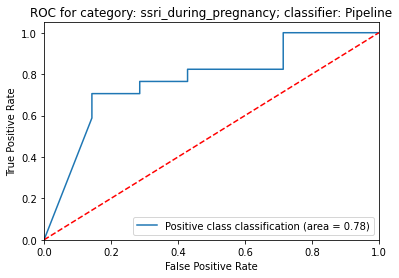

              precision    recall  f1-score   support

           0       0.55      0.86      0.67         7
           1       0.92      0.71      0.80        17

    accuracy                           0.75        24
   macro avg       0.73      0.78      0.73        24
weighted avg       0.81      0.75      0.76        24

['body']


In [ ]:
pipeline = Pipeline(memory=None,
                    steps=[('logisticregression',
                            LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                                fit_intercept=True, intercept_scaling=1,
                                                l1_ratio=None, max_iter=10000,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001, verbose=0,
                                                warm_start=False))],
                    verbose=False)
sup, n_ftrs, rank, important_features = fit_clf_and_show_ROC(pipeline, 
                                                             ssri_during_pregnancy_X, 
                                                             ssri_during_pregnancy_Y, 
                                                             category='ssri_during_pregnancy',
                                                             num_important_features=200, 
                                                             VALIDATION_SPLIT=0.4)

### allergy testing

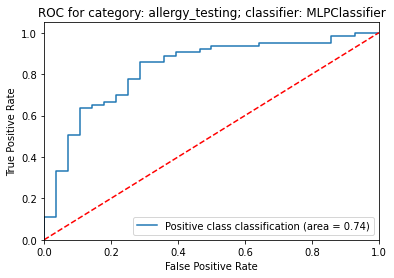

              precision    recall  f1-score   support

           0       0.73      0.57      0.64        28
           1       0.83      0.90      0.86        63

    accuracy                           0.80        91
   macro avg       0.78      0.74      0.75        91
weighted avg       0.80      0.80      0.79        91

['WC', 'WPS', 'function', 'pronoun', 'prep', 'adverb', 'conj', 'negate', 'verb', 'adj', 'compare', 'number', 'affect', 'posemo', 'negemo', 'anx', 'sad', 'friend', 'female', 'male', 'certain', 'percept', 'see', 'hear', 'body', 'drives', 'affiliation', 'achieve', 'power', 'reward', 'risk', 'focuspresent', 'relativ', 'time', 'leisure', 'home', 'relig', 'death', 'informal', 'netspeak', 'assent', 'Period', 'SemiC', 'QMark', 'Exclam', 'Apostro', 'CARDINAL', 'ORG', 'PERSON', 'DATE', 'PERCENT', 'TIME', 'ORDINAL', 'PRODUCT', 'LOC', 'WORK_OF_ART', 'abdomin', 'about', 'abov', 'accomplish', 'acn', 'acupunctur', 'addit', 'advertis', 'against', 'agro', 'alessio', 'allerg', 'alle

In [ ]:
clf = MLPClassifier(max_iter=3000, solver='adam', hidden_layer_sizes=(50,20))
sup, n_ftrs, rank, important_features = fit_clf_and_show_ROC(clf, 
                                                             allergy_testing_X, 
                                                             allergy_testing_Y, 
                                                             category='allergy_testing',
                                                             num_important_features=200, 
                                                             VALIDATION_SPLIT=0.2)

### antioxidants

In [ ]:
np.shape(antioxidants_X)

(225, 1674)

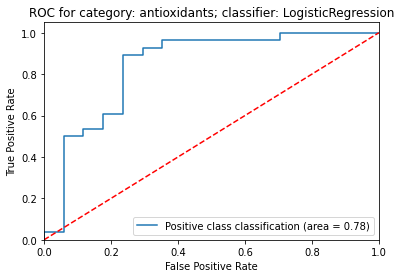

              precision    recall  f1-score   support

           0       0.68      0.76      0.72        17
           1       0.85      0.79      0.81        28

    accuracy                           0.78        45
   macro avg       0.77      0.78      0.77        45
weighted avg       0.78      0.78      0.78        45

['WPS', 'Dic', 'function', 'pronoun', 'ppron', 'we', 'you', 'they', 'prep', 'adverb', 'conj', 'adj', 'compare', 'interrog', 'number', 'negemo', 'anx', 'anger', 'sad', 'social', 'friend', 'female', 'male', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'percept', 'see', 'hear', 'feel', 'bio', 'body', 'health', 'sexual', 'achieve', 'power', 'risk', 'focusfuture', 'space', 'time', 'work', 'home', 'death', 'informal', 'netspeak', 'assent', 'nonflu', 'AllPunc', 'Period', 'Comma', 'Colon', 'Exclam', 'Dash', 'Quote', 'Apostro', 'Parenth', 'OtherP', 'PERSON', 'ORG', 'CARDINAL', 'NORP', 'ORDINAL', 'PERCENT', 'WORK_OF_ART', 'QUANTITY', 'TIME', 'LOC', 'EVENT', 'abl', 'ac

In [ ]:
clf = LogisticRegression(class_weight='balanced', max_iter=10000)
sup, n_ftrs, rank, important_features = fit_clf_and_show_ROC(clf, 
                                                             antioxidants_X, 
                                                             antioxidants_Y, 
                                                             category='antioxidants',
                                                             num_important_features=500,
                                                             VALIDATION_SPLIT=0.2)

# **TPOT model selection**

In [ ]:
!pip install deap update_checker tqdm stopit xgboost

In [ ]:
!pip install tpot

In [ ]:
from tpot import TPOTClassifier
from tpot.config import classifier_config_dict
import random as r

In [65]:
tpot_config = {
    'sklearn.linear_model.LogisticRegression': {
        'class_weight': [None, 'balanced'],
        'max_iter': [10000]
    },

    'sklearn.neural_network.MLPClassifier': {
        'hidden_layer_sizes': [(50, 20), (20,20), (30, 10)],
        'activation': ['relu', 'logistic'],
        'learning_rate': ['adaptive']
    },

    'sklearn.ensemble.GradientBoostingClassifier': {
    }
}

def teapot_optimizer(X, Y, num_important_features, random=False, tpot_config=tpot_config, 
                     cv=10, VALIDATION_SPLIT=0.2, category='undefined', scoring='roc_auc',
                     standarize=True):
  
  if random:
    print("Choosing random features...")
    important_features = random.sample(list(X.columns.values), num_important_features)
  else:
    print("Running RFE to find the most supportive features")
    _,_,_,important_features = get_n_most_important(num_important_features, X, Y, standarize=standarize)

  print("Number of features: ", str(len(important_features)))
  print(important_features)

  X = X[important_features]

  if standarize:
    scaled_features = standard_scaler.fit_transform(X)
    X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=VALIDATION_SPLIT, stratify=Y)

  tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, 
                        scoring=scoring, cv=cv, subsample=VALIDATION_SPLIT,
                        config_dict=tpot_config)
  tpot.fit(X_train, y_train)

  clf_roc_auc = roc_auc_score(y_test, tpot.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, tpot.predict_proba(X_test)[:,1])
  plt.figure()
  plt.plot(fpr, tpr, label='Positive class classification (area = %0.2f)' % clf_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC for category: ' + category + '; classifier: ' + tpot.__class__.__name__ )
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()
  
  from sklearn.metrics import classification_report
  
  print(classification_report(y_test, tpot.predict(X_test)))

  return tpot
  # tpot.export('tpot_digits_pipeline_antioxidants.py')

## vaccines

In [ ]:
np.shape(vaccination_X)

(482, 2854)

Running RFE to find the most supportive features
Optimal number of features : 794


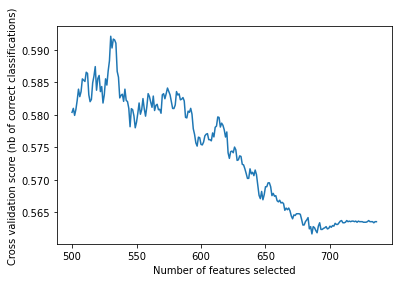

Number of features:  794
['WC', 'WPS', 'Sixltr', 'ipron', 'auxverb', 'conj', 'interrog', 'anx', 'social', 'insight', 'cause', 'tentat', 'differ', 'body', 'drives', 'risk', 'leisure', 'money', 'death', 'informal', 'nonflu', 'Comma', 'GPE', 'ORDINAL', 'MONEY', 'FAC', 'LAW', 'LOC', 'aabi', 'abort', 'abstract', 'academi', 'accordingli', 'achiev', 'action', 'add', 'adhd', 'adjust', 'administr', 'adult', 'advis', 'afghanistan', 'after', 'ag', 'against', 'age', 'ago', 'ailment', 'alarmingli', 'all', 'alleg', 'allow', 'amount', 'amput', 'an', 'analysi', 'analyz', 'and', 'anim', 'annual', 'anoth', 'anti', 'antibiot', 'antigen', 'anybodi', 'anyon', 'appli', 'approach', 'approv', 'approxim', 'are', 'aren', 'argument', 'arm', 'articl', 'ask', 'attempt', 'attenu', 'autoimmun', 'away', 'background', 'bacteria', 'bandim', 'base', 'be', 'bear', 'becaus', 'begin', 'belief', 'best', 'beyond', 'bias', 'bill', 'billion', 'birth', 'birthweight', 'blatant', 'blind', 'bloomberg', 'bodi', 'body', 'boil', 'boo


Generation 1 - Current best internal CV score: 0.7770833333333333

Generation 2 - Current best internal CV score: 0.7770833333333333

Generation 3 - Current best internal CV score: 0.7770833333333333

Generation 4 - Current best internal CV score: 0.7770833333333333

Generation 5 - Current best internal CV score: 0.7770833333333333

Best pipeline: MLPClassifier(input_matrix, activation=relu, hidden_layer_sizes=(50, 20), learning_rate=adaptive)


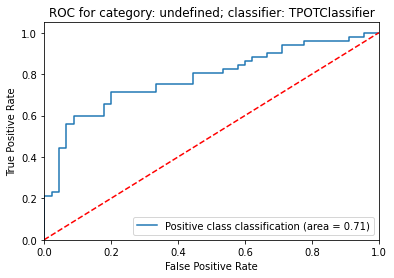

              precision    recall  f1-score   support

           0       0.68      0.71      0.70        45
           1       0.74      0.71      0.73        52

    accuracy                           0.71        97
   macro avg       0.71      0.71      0.71        97
weighted avg       0.71      0.71      0.71        97



In [76]:
tpot_vac = teapot_optimizer(vaccination_X, 
                             vaccination_Y,
                             num_important_features = 500,
                            standarize=True)

## statins

Running RFE to find the most supportive features
Optimal number of features : 1335


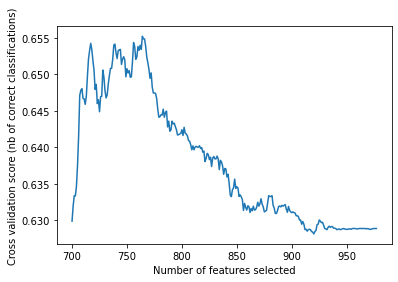

Number of features:  1335
['Analytic', 'Authentic', 'Sixltr', 'Dic', 'function', 'pronoun', 'ppron', 'i', 'we', 'shehe', 'ipron', 'prep', 'adverb', 'negate', 'verb', 'interrog', 'number', 'affect', 'posemo', 'negemo', 'sad', 'social', 'friend', 'cogproc', 'insight', 'cause', 'tentat', 'percept', 'bio', 'health', 'ingest', 'affiliation', 'power', 'reward', 'focuspast', 'focuspresent', 'focusfuture', 'relativ', 'space', 'money', 'death', 'assent', 'Period', 'Comma', 'QMark', 'Dash', 'Apostro', 'ORG', 'GPE', 'DATE', 'PRODUCT', 'TIME', 'WORK_OF_ART', 'LANGUAGE', 'aberr', 'abil', 'abl', 'abnorm', 'abov', 'absolut', 'abstract', 'academ', 'academi', 'accept', 'access', 'accomplish', 'accur', 'accus', 'ach', 'acid', 'acids', 'across', 'action', 'activ', 'actual', 'ad', 'adequ', 'administr', 'adren', 'advanc', 'advertis', 'advis', 'afford', 'ag', 'again', 'age', 'agre', 'aim', 'al', 'albacor', 'alcohol', 'almond', 'alon', 'along', 'alreadi', 'also', 'although', 'alway', 'am', 'america', 'among'


Generation 1 - Current best internal CV score: 0.8952380952380953

Generation 2 - Current best internal CV score: 0.8952380952380953

Generation 3 - Current best internal CV score: 0.9035714285714287

Generation 4 - Current best internal CV score: 0.9035714285714287

Generation 5 - Current best internal CV score: 0.9035714285714287

Best pipeline: MLPClassifier(GradientBoostingClassifier(input_matrix), activation=logistic, hidden_layer_sizes=(20, 20), learning_rate=adaptive)


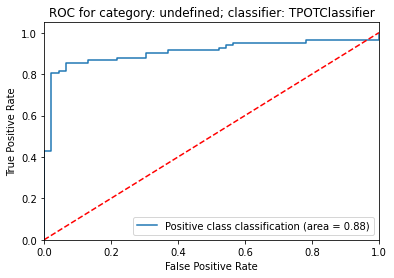

              precision    recall  f1-score   support

           0       0.71      0.98      0.83        46
           1       0.98      0.78      0.87        82

    accuracy                           0.85       128
   macro avg       0.85      0.88      0.85       128
weighted avg       0.89      0.85      0.85       128



In [77]:
tpot_stat = teapot_optimizer(statins_X, 
                             statins_Y,
                             num_important_features = 700)

## ssri_during_pregnancy

Running RFE to find the most supportive features
Optimal number of features : 176


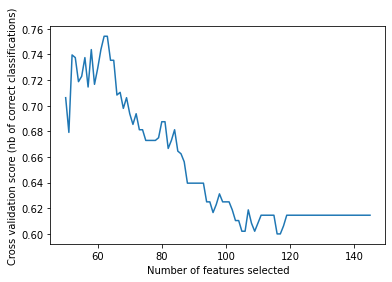

Number of features:  176
['adverb', 'number', 'anx', 'friend', 'bio', 'body', 'health', 'sexual', 'drives', 'risk', 'focuspresent', 'relativ', 'time', 'informal', 'Period', 'Comma', 'SemiC', 'OtherP', 'PERSON', 'NORP', 'PERCENT', 'acid', 'advers', 'affect', 'age', 'aj', 'al', 'am', 'amarillo', 'american', 'among', 'anim', 'anti', 'antidepress', 'appear', 'assess', 'at', 'autism', 'been', 'beyond', 'blood', 'bmj', 'brain', 'bt', 'call', 'chang', 'choic', 'circuitri', 'citalopram', 'claudia', 'clear', 'clinic', 'close', 'coauthor', 'cognit', 'colleagu', 'columbia', 'confus', 'contrast', 'correl', 'current', 'depressive', 'develop', 'differ', 'directli', 'doe', 'dure', 'earli', 'effici', 'email', 'et', 'explor', 'factor', 'feb', 'fellow', 'find', 'first', 'focu', 'form', 'four', 'from', 'grow', 'had', 'hartz', 'health', 'hendrick', 'highest', 'highli', 'histori', 'human', 'identifi', 'immedi', 'impair', 'implic', 'incomplet', 'individu', 'intens', 'involv', 'journal', 'joy', 'left', 'less


Generation 1 - Current best internal CV score: 1.0

Generation 2 - Current best internal CV score: 1.0

Generation 3 - Current best internal CV score: 1.0

Generation 4 - Current best internal CV score: 1.0

Generation 5 - Current best internal CV score: 1.0

Best pipeline: MLPClassifier(input_matrix, activation=relu, hidden_layer_sizes=(30, 10), learning_rate=adaptive)


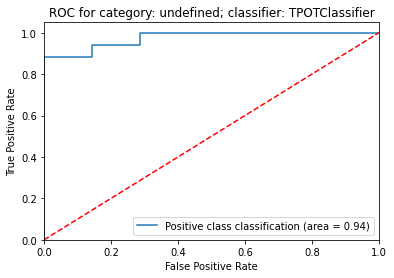

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.88      0.94        17

    accuracy                           0.92        24
   macro avg       0.89      0.94      0.91        24
weighted avg       0.94      0.92      0.92        24



In [81]:
tpot_ssri = teapot_optimizer(ssri_during_pregnancy_X, 
                             ssri_during_pregnancy_Y,
                             num_important_features = 50, 
                             cv=5,
                             VALIDATION_SPLIT=0.4)

Optimal number of features : 176


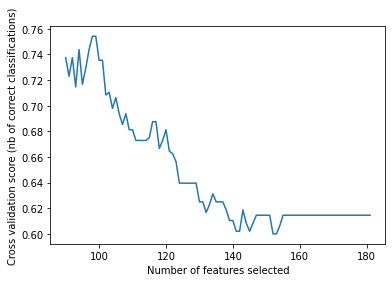

Number of features:  176
['adverb', 'number', 'anx', 'friend', 'bio', 'body', 'health', 'sexual', 'drives', 'risk', 'focuspresent', 'relativ', 'time', 'informal', 'Period', 'Comma', 'SemiC', 'OtherP', 'PERSON', 'NORP', 'PERCENT', 'acid', 'advers', 'affect', 'age', 'aj', 'al', 'am', 'amarillo', 'american', 'among', 'anim', 'anti', 'antidepress', 'appear', 'assess', 'at', 'autism', 'been', 'beyond', 'blood', 'bmj', 'brain', 'bt', 'call', 'chang', 'choic', 'circuitri', 'citalopram', 'claudia', 'clear', 'clinic', 'close', 'coauthor', 'cognit', 'colleagu', 'columbia', 'confus', 'contrast', 'correl', 'current', 'depressive', 'develop', 'differ', 'directli', 'doe', 'dure', 'earli', 'effici', 'email', 'et', 'explor', 'factor', 'feb', 'fellow', 'find', 'first', 'focu', 'form', 'four', 'from', 'grow', 'had', 'hartz', 'health', 'hendrick', 'highest', 'highli', 'histori', 'human', 'identifi', 'immedi', 'impair', 'implic', 'incomplet', 'individu', 'intens', 'involv', 'journal', 'joy', 'left', 'less

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


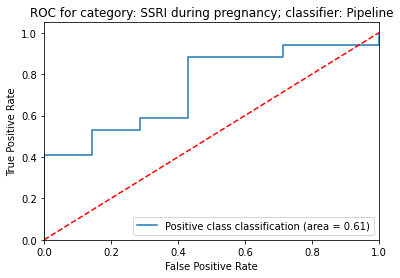

              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.76      0.94      0.84        17

    accuracy                           0.75        24
   macro avg       0.71      0.61      0.62        24
weighted avg       0.73      0.75      0.71        24



In [83]:
_,_,_,if_ssri = fit_clf_and_show_ROC(tpot_ssri.fitted_pipeline_, 
                     ssri_during_pregnancy_X,
                     ssri_during_pregnancy_Y,
                     category='SSRI during pregnancy',
                     num_important_features=90,
                     VALIDATION_SPLIT=0.4)

## antioxidants

In [ ]:
np.shape(antioxidants_X)

(225, 1674)

Running RFE to find the most supportive features
Optimal number of features : 394


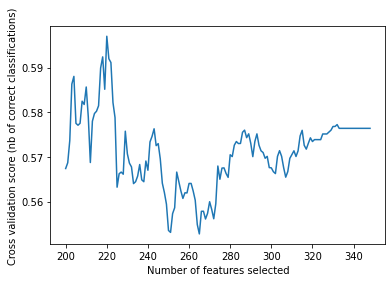

Number of features:  394
['Tone', 'function', 'pronoun', 'ppron', 'you', 'they', 'prep', 'conj', 'adj', 'compare', 'interrog', 'posemo', 'negemo', 'anx', 'friend', 'cogproc', 'cause', 'discrep', 'certain', 'percept', 'bio', 'health', 'ingest', 'space', 'work', 'death', 'Colon', 'Apostro', 'OtherP', 'PERCENT', 'TIME', 'abil', 'abnorm', 'about', 'access', 'accompani', 'accord', 'acn', 'acorn', 'acquir', 'acétat', 'ad', 'addit', 'advantag', 'affect', 'aid', 'aim', 'alcohol', 'all', 'allevi', 'alon', 'alreadi', 'alway', 'alzheim', 'and', 'anoth', 'anthoni', 'anti', 'antioxid', 'appar', 'appetit', 'appli', 'are', 'ascorb', 'ask', 'assum', 'at', 'attack', 'attribut', 'be', 'becaus', 'bed', 'behav', 'belong', 'benefit', 'better', 'bioavail', 'black', 'blind', 'blueberri', 'board', 'bodi', 'bodili', 'bon', 'brighten', 'bring', 'bulk', 'but', 'calcium', 'can', 'capsul', 'categor', 'caus', 'cell', 'cellar', 'cellular', 'certain', 'certifi', 'chain', 'check', 'chronic', 'cigarett', 'cite', 'cold'


Generation 1 - Current best internal CV score: 0.9

Generation 2 - Current best internal CV score: 0.9

Generation 3 - Current best internal CV score: 0.9166666666666666

Generation 4 - Current best internal CV score: 0.9333333333333332

Generation 5 - Current best internal CV score: 0.9333333333333332

Best pipeline: MLPClassifier(LogisticRegression(input_matrix, class_weight=balanced, max_iter=10000), activation=logistic, hidden_layer_sizes=(30, 10), learning_rate=adaptive)


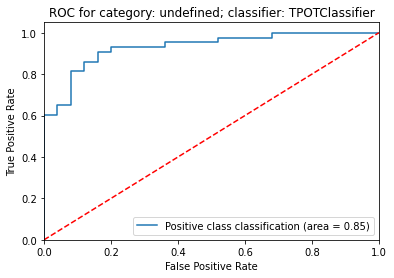

              precision    recall  f1-score   support

           0       0.83      0.80      0.82        25
           1       0.89      0.91      0.90        43

    accuracy                           0.87        68
   macro avg       0.86      0.85      0.86        68
weighted avg       0.87      0.87      0.87        68



In [84]:
tpot_antiox = teapot_optimizer(antioxidants_X, 
                               antioxidants_Y, 
                               num_important_features = 200,
                               VALIDATION_SPLIT=0.3)

# clf = LogisticRegression(class_weight='balanced', max_iter=10000)

## psychiatry

In [ ]:
np.shape(psychiatry_X)

(807, 4126)

Running RFE to find the most supportive features
Optimal number of features : 1156


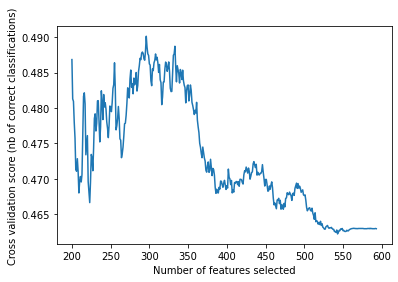

Number of features:  1156
['Sixltr', 'Dic', 'pronoun', 'we', 'they', 'ipron', 'auxverb', 'negate', 'interrog', 'anx', 'social', 'friend', 'certain', 'percept', 'see', 'hear', 'bio', 'health', 'focuspresent', 'work', 'informal', 'swear', 'AllPunc', 'Colon', 'QMark', 'Dash', 'Parenth', 'OtherP', 'PERSON', 'ORG', 'ORDINAL', 'PERCENT', 'TIME', 'abov', 'abruptli', 'abus', 'academ', 'access', 'accomplish', 'accumul', 'acetylcholin', 'achiev', 'acquaint', 'act', 'action', 'activ', 'adapt', 'address', 'adher', 'administr', 'advanc', 'advantag', 'advis', 'aforement', 'afterward', 'agent', 'agre', 'ah', 'ailment', 'al', 'alcohol', 'algerian', 'allevi', 'alon', 'also', 'am', 'amazingli', 'american', 'amongst', 'amplifi', 'anafranil', 'anesthesia', 'angel', 'anim', 'annoy', 'annual', 'antianxieti', 'antidepress', 'antihypertens', 'anxieti', 'anyth', 'appar', 'appear', 'appreci', 'appropri', 'approv', 'april', 'aren', 'aricept', 'arriv', 'articl', 'asid', 'ask', 'asleep', 'aspect', 'assault', 'assi


Generation 1 - Current best internal CV score: 0.8954761904761905

Generation 2 - Current best internal CV score: 0.9053571428571429

Generation 3 - Current best internal CV score: 0.9099999999999999

Generation 4 - Current best internal CV score: 0.9099999999999999

Generation 5 - Current best internal CV score: 0.9099999999999999

Best pipeline: MLPClassifier(MLPClassifier(CombineDFs(input_matrix, input_matrix), activation=relu, hidden_layer_sizes=(30, 10), learning_rate=adaptive), activation=logistic, hidden_layer_sizes=(30, 10), learning_rate=adaptive)


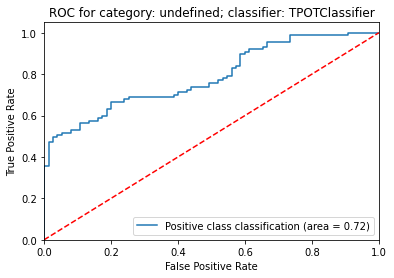

              precision    recall  f1-score   support

           0       0.67      0.77      0.72        75
           1       0.77      0.67      0.72        87

    accuracy                           0.72       162
   macro avg       0.72      0.72      0.72       162
weighted avg       0.72      0.72      0.72       162



In [85]:
tpot_psych = teapot_optimizer(psychiatry_X, 
                               psychiatry_Y, 
                               num_important_features = 200,
                               VALIDATION_SPLIT=0.2)

## diet and Autism

In [ ]:
np.shape(diet_and_autism_X)

(182, 1804)

Running RFE to find the most supportive features
Optimal number of features : 214


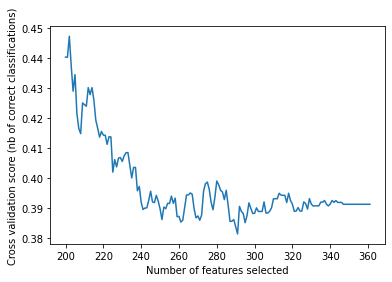

Number of features:  214
['we', 'article', 'affect', 'posemo', 'negemo', 'anger', 'friend', 'male', 'work', 'leisure', 'money', 'netspeak', 'Period', 'Colon', 'Apostro', 'DATE', 'GPE', 'abstract', 'accept', 'account', 'add', 'addict', 'after', 'allergen', 'allevi', 'alter', 'an', 'analysi', 'approach', 'are', 'articl', 'autist', 'bad', 'barley', 'basic', 'befor', 'beforehand', 'between', 'black', 'both', 'bring', 'buckwheat', 'build', 'can', 'carbohydr', 'carri', 'casein', 'cereal', 'cf', 'chip', 'chocol', 'clarifi', 'commonli', 'complic', 'consult', 'cours', 'current', 'dark', 'data', 'decid', 'deriv', 'development', 'did', 'diet', 'dietician', 'direct', 'diseas', 'disord', 'doctor', 'dosag', 'dr', 'dramat', 'drug', 'dye', 'each', 'eat', 'empti', 'encourag', 'energi', 'enough', 'etc', 'exampl', 'exorphin', 'exposur', 'extrem', 'feingold', 'ferguson', 'field', 'find', 'flake', 'follow', 'fresh', 'fulli', 'further', 'gastrointestin', 'genet', 'get', 'gf', 'groceri', 'ha', 'habit', 'have


Generation 1 - Current best internal CV score: 0.925

Generation 2 - Current best internal CV score: 0.925

Generation 3 - Current best internal CV score: 0.925

Generation 4 - Current best internal CV score: 0.925

Generation 5 - Current best internal CV score: 0.925

Best pipeline: MLPClassifier(GradientBoostingClassifier(input_matrix), activation=logistic, hidden_layer_sizes=(50, 20), learning_rate=adaptive)


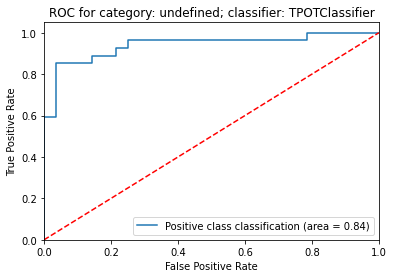

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.80      0.89      0.84        27

    accuracy                           0.84        55
   macro avg       0.84      0.84      0.84        55
weighted avg       0.84      0.84      0.84        55



In [86]:
tpot_da = teapot_optimizer(diet_and_autism_X, 
                               diet_and_autism_Y, 
                               num_important_features = 200,
                               VALIDATION_SPLIT=0.3)

In [ ]:
tpot_da.fitted_pipeline_

Pipeline(memory=None,
         steps=[('stackingestimator',
                 StackingEstimator(estimator=MLPClassifier(activation='relu',
                                                           alpha=0.0001,
                                                           batch_size='auto',
                                                           beta_1=0.9,
                                                           beta_2=0.999,
                                                           early_stopping=False,
                                                           epsilon=1e-08,
                                                           hidden_layer_sizes=(50,
                                                                               20),
                                                           learning_rate='adaptive',
                                                           learning_rate_init=0.001,
                                                           max_fun=15000,
 

## aspirin during pregnancy

In [ ]:
np.shape(aspirin_pregnancy_X)

(109, 1327)

Running RFE to find the most supportive features
Optimal number of features : 647


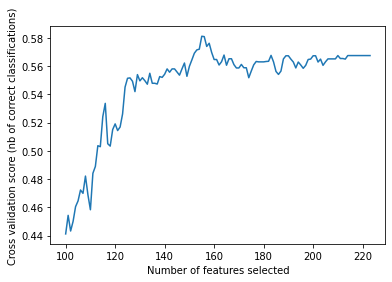

Number of features:  647
['WC', 'Clout', 'Tone', 'WPS', 'Sixltr', 'Dic', 'function', 'i', 'we', 'shehe', 'they', 'ipron', 'auxverb', 'negate', 'verb', 'posemo', 'negemo', 'anx', 'anger', 'social', 'friend', 'female', 'male', 'cogproc', 'insight', 'discrep', 'tentat', 'certain', 'hear', 'bio', 'body', 'health', 'sexual', 'ingest', 'achieve', 'reward', 'risk', 'focuspast', 'focuspresent', 'focusfuture', 'relativ', 'motion', 'space', 'home', 'informal', 'assent', 'nonflu', 'Period', 'Colon', 'SemiC', 'QMark', 'Exclam', 'Dash', 'Parenth', 'OtherP', 'GPE', 'ORG', 'PERCENT', 'LOC', 'TIME', 'abl', 'about', 'abov', 'abrupt', 'accompani', 'accord', 'ace', 'acetaminophen', 'acetylsalicyl', 'achiev', 'action', 'activ', 'addict', 'addit', 'administ', 'administr', 'advers', 'advis', 'affect', 'afraid', 'after', 'age', 'ailment', 'all', 'allevi', 'alon', 'although', 'altogeth', 'am', 'american', 'amniot', 'amount', 'an', 'analges', 'analyz', 'and', 'anoth', 'answer', 'anti', 'antidiabet', 'antiphosp


Generation 1 - Current best internal CV score: 0.975

Generation 2 - Current best internal CV score: 0.975

Generation 3 - Current best internal CV score: 0.975

Generation 4 - Current best internal CV score: 0.975

Generation 5 - Current best internal CV score: 0.975

Best pipeline: MLPClassifier(GradientBoostingClassifier(input_matrix), activation=logistic, hidden_layer_sizes=(30, 10), learning_rate=adaptive)


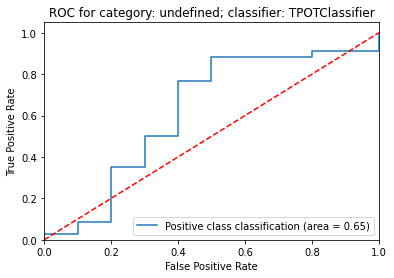

              precision    recall  f1-score   support

           0       0.42      0.50      0.45        10
           1       0.84      0.79      0.82        34

    accuracy                           0.73        44
   macro avg       0.63      0.65      0.64        44
weighted avg       0.75      0.73      0.74        44



In [88]:
tpot_aspirin = teapot_optimizer(aspirin_pregnancy_X, 
                               aspirin_pregnancy_Y, 
                               num_important_features = 100,
                              cv=5,
                               VALIDATION_SPLIT=0.4)

## allergy testing

In [ ]:
np.shape(allergy_testing_X)

(451, 2341)

Running RFE to find the most supportive features
Optimal number of features : 1041


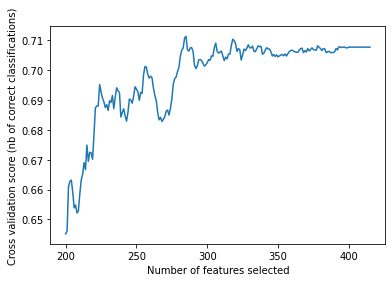

Number of features:  1041
['WC', 'Analytic', 'Tone', 'Sixltr', 'Dic', 'function', 'ppron', 'i', 'we', 'they', 'article', 'auxverb', 'negate', 'verb', 'adj', 'compare', 'number', 'anx', 'anger', 'sad', 'family', 'cogproc', 'insight', 'discrep', 'tentat', 'certain', 'differ', 'bio', 'health', 'sexual', 'drives', 'affiliation', 'power', 'reward', 'risk', 'focuspast', 'focuspresent', 'focusfuture', 'motion', 'time', 'work', 'money', 'relig', 'death', 'informal', 'swear', 'nonflu', 'Period', 'Comma', 'SemiC', 'QMark', 'Exclam', 'Quote', 'Apostro', 'Parenth', 'OtherP', 'CARDINAL', 'ORG', 'DATE', 'PERCENT', 'WORK_OF_ART', 'MONEY', 'aaaai', 'abdomin', 'abil', 'abov', 'absolut', 'absorb', 'accessori', 'accomplish', 'account', 'accumul', 'ach', 'achiev', 'acn', 'act', 'activ', 'acupunctur', 'ad', 'add', 'addit', 'addressintoler', 'adequ', 'adhes', 'administr', 'advanc', 'advis', 'advoc', 'affect', 'afterward', 'against', 'age', 'agre', 'agro', 'ah', 'alcohol', 'allerg', 'allergi', 'allergy', 'al


Generation 1 - Current best internal CV score: 0.9566666666666667

Generation 2 - Current best internal CV score: 0.9566666666666667

Generation 3 - Current best internal CV score: 0.9566666666666667

Generation 4 - Current best internal CV score: 0.9566666666666667

Generation 5 - Current best internal CV score: 0.9566666666666667

Best pipeline: LogisticRegression(CombineDFs(input_matrix, input_matrix), class_weight=balanced, max_iter=10000)


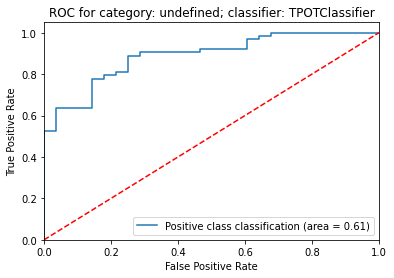

              precision    recall  f1-score   support

           0       1.00      0.21      0.35        28
           1       0.74      1.00      0.85        63

    accuracy                           0.76        91
   macro avg       0.87      0.61      0.60        91
weighted avg       0.82      0.76      0.70        91



In [89]:
tpot_allergy = teapot_optimizer(allergy_testing_X, 
                               allergy_testing_Y, 
                               num_important_features = 200,
                               VALIDATION_SPLIT=0.2)

## heart supplements

In [ ]:
np.shape(heart_supplements_X)

(150, 1543)

Running RFE to find the most supportive features
Optimal number of features : 513


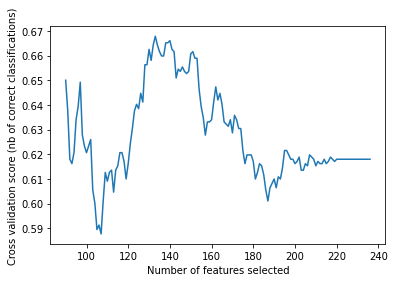

Number of features:  513
['Analytic', 'Sixltr', 'function', 'i', 'shehe', 'they', 'article', 'prep', 'auxverb', 'negate', 'adj', 'number', 'quant', 'affect', 'negemo', 'anger', 'sad', 'female', 'male', 'cause', 'bio', 'health', 'ingest', 'drives', 'reward', 'focuspast', 'time', 'work', 'money', 'Comma', 'Colon', 'OtherP', 'DATE', 'GPE', 'PRODUCT', 'NORP', 'EVENT', 'about', 'abov', 'absorb', 'accompani', 'acid', 'addit', 'adequ', 'adher', 'advis', 'against', 'aid', 'alert', 'alga', 'algal', 'almost', 'alon', 'alpha', 'american', 'amount', 'anger', 'angina', 'ani', 'annal', 'anoth', 'anti', 'appear', 'appli', 'appropri', 'are', 'arugula', 'asbesto', 'asian', 'assess', 'assign', 'astaxanthin', 'at', 'attack', 'attribut', 'back', 'becaus', 'been', 'beetroot', 'believ', 'benefit', 'berberin', 'between', 'beyond', 'biggest', 'bloodstream', 'bodi', 'book', 'bowden', 'bowel', 'build', 'buildup', 'burden', 'call', 'cancer', 'cap', 'car', 'carcinogen', 'cardiologist', 'cardiovascular', 'caroteno


Generation 1 - Current best internal CV score: 1.0

Generation 2 - Current best internal CV score: 1.0

Generation 3 - Current best internal CV score: 1.0

Generation 4 - Current best internal CV score: 1.0

Generation 5 - Current best internal CV score: 1.0

Best pipeline: MLPClassifier(input_matrix, activation=logistic, hidden_layer_sizes=(30, 10), learning_rate=adaptive)


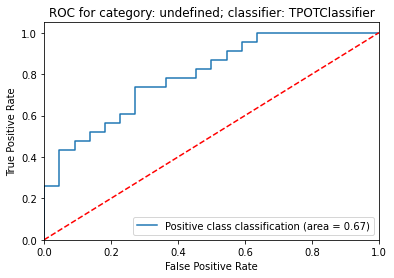

              precision    recall  f1-score   support

           0       0.64      0.73      0.68        22
           1       0.70      0.61      0.65        23

    accuracy                           0.67        45
   macro avg       0.67      0.67      0.67        45
weighted avg       0.67      0.67      0.67        45



In [90]:
tpot_heart = teapot_optimizer(heart_supplements_X, 
                               heart_supplements_Y, 
                               num_important_features = 90,
                               VALIDATION_SPLIT=0.3)

# clf = MLPClassifier(max_iter=3000, solver='adam', hidden_layer_sizes=(50,20))

## steroids for kids

In [ ]:
np.shape(steroids_for_kids_X)

(241, 1515)

Running RFE to find the most supportive features
Optimal number of features : 125


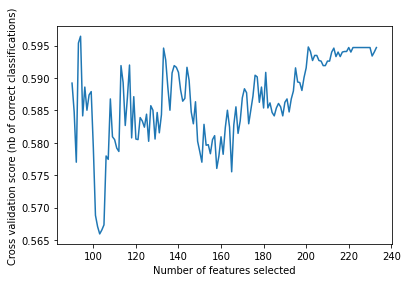

Number of features:  125
['i', 'we', 'compare', 'affiliation', 'reward', 'assent', 'Exclam', 'absorb', 'adren', 'affect', 'age', 'all', 'almost', 'anim', 'antispasmod', 'athlet', 'bacteria', 'bad', 'becaus', 'becom', 'begin', 'between', 'bone', 'bronchoconstrict', 'chanc', 'chicken', 'chosen', 'chronic', 'come', 'complain', 'congenit', 'contamin', 'coronari', 'cure', 'data', 'deep', 'definit', 'diseas', 'distant', 'dizzi', 'doctor', 'doe', 'drink', 'ever', 'exercis', 'extrem', 'form', 'four', 'fourth', 'gland', 'graviti', 'hear', 'heart', 'hyperplasia', 'immedi', 'immin', 'import', 'increas', 'insidi', 'intensifi', 'jra', 'lactos', 'lactose', 'latest', 'liquid', 'live', 'local', 'lowest', 'make', 'marker', 'medic', 'met', 'myocardi', 'no', 'nurs', 'often', 'one', 'patholog', 'peac', 'perform', 'poland', 'pox', 'process', 'proven', 'publish', 'purpos', 'rare', 'reaction', 'realiz', 'recommend', 'reflux', 'rule', 'save', 'secondli', 'seriou', 'sick', 'stuck', 'sugar', 'support', 'symptom


Generation 1 - Current best internal CV score: 1.0

Generation 2 - Current best internal CV score: 1.0

Generation 3 - Current best internal CV score: 1.0

Generation 4 - Current best internal CV score: 1.0

Generation 5 - Current best internal CV score: 1.0

Best pipeline: MLPClassifier(CombineDFs(input_matrix, input_matrix), activation=logistic, hidden_layer_sizes=(20, 20), learning_rate=adaptive)


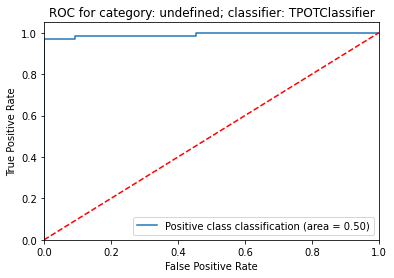

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.85      1.00      0.92        62

    accuracy                           0.85        73
   macro avg       0.42      0.50      0.46        73
weighted avg       0.72      0.85      0.78        73



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
tpot_steroids = teapot_optimizer(steroids_for_kids_X, 
                               steroids_for_kids_Y, 
                               num_important_features = 90,
                               VALIDATION_SPLIT=0.3)

# clf = MLPClassifier(max_iter=3000, solver='adam', hidden_layer_sizes=(50,20))

## children antibiotics

In [ ]:
np.shape(children_antibiotics_X)

(185, 1678)

In [ ]:
teapot_optimizer(250, children_antibiotics_X, children_antibiotics_Y, teapot_config)

## cc_vs_nb

In [ ]:
np.shape(cc_vs_nb_X)

(171, 1620)

In [ ]:
teapot_optimizer(250, cc_vs_nb_X, cc_vs_nb_Y, teapot_config)